In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [29]:

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-11,100.800003,101.000000,99.010002,99.919998,99.919998,60417800,AMAZON
2023-04-12,100.400002,100.510002,97.709999,97.830002,97.830002,56735000,AMAZON
2023-04-13,98.949997,102.570000,98.709999,102.400002,102.400002,67925100,AMAZON
2023-04-14,102.070000,103.199997,101.110001,102.510002,102.510002,51388300,AMAZON
2023-04-17,103.160004,103.730003,101.589996,102.739998,102.739998,39919500,AMAZON
2023-04-18,103.949997,104.199997,101.519997,102.300003,102.300003,39790500,AMAZON
2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58398900,AMAZON
2023-04-20,103.529999,105.250000,103.209999,103.809998,103.809998,57696900,AMAZON
2023-04-21,106.099998,108.150002,105.080002,106.959999,106.959999,86689700,AMAZON


In [30]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,257.098805,260.348924,253.962629,257.317131,256.169281,2.961607e+07
std,18.091206,17.959287,18.022471,18.197179,18.087209,1.027917e+07
min,217.550003,220.410004,213.429993,214.250000,213.114120,9.200800e+06
25%,243.160004,245.305000,240.264999,242.354996,241.440262,2.277770e+07
50%,256.390015,259.720001,252.770004,255.139999,254.502548,2.740340e+07
75%,271.884995,274.709991,267.714996,271.595001,270.128815,3.354865e+07
max,291.989990,294.179993,290.420013,293.470001,291.600006,8.610200e+07


In [31]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-04-25 to 2023-04-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


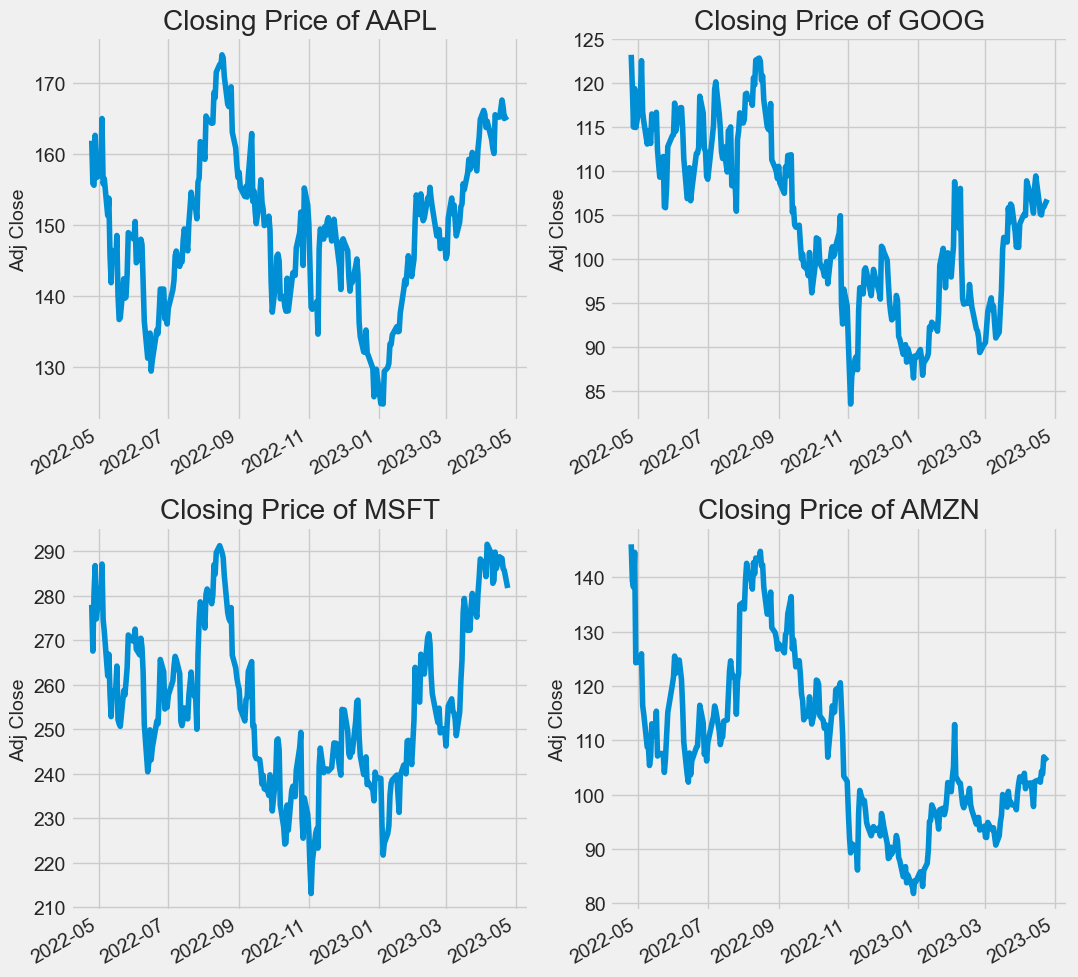

In [32]:
# Let's see a historical view of the closing price
plt.figure(figsize=(11, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

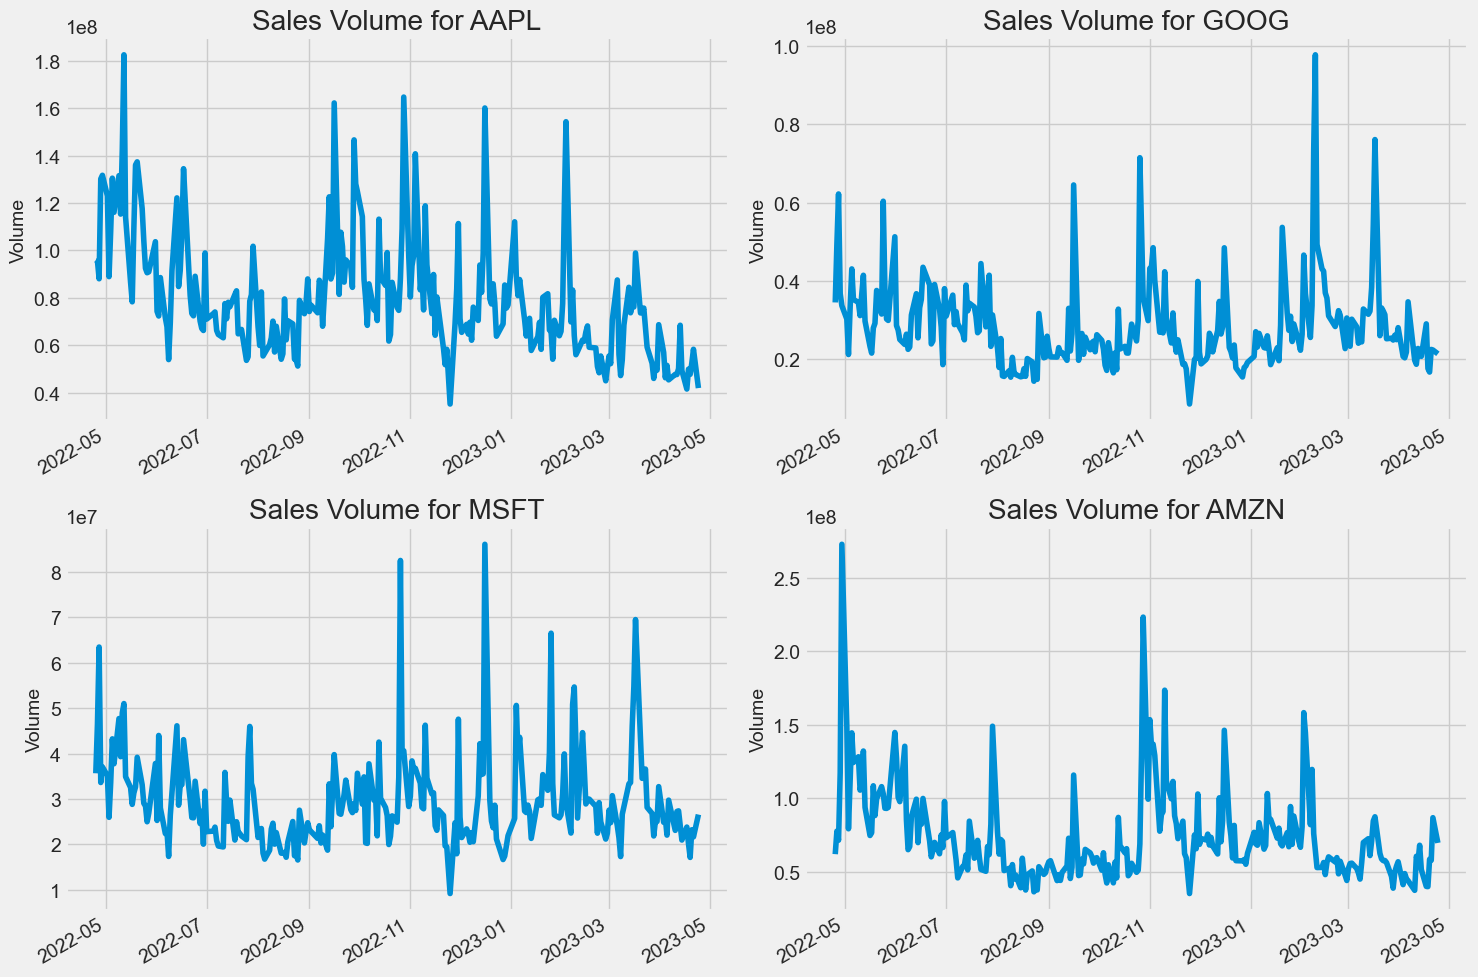

In [33]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

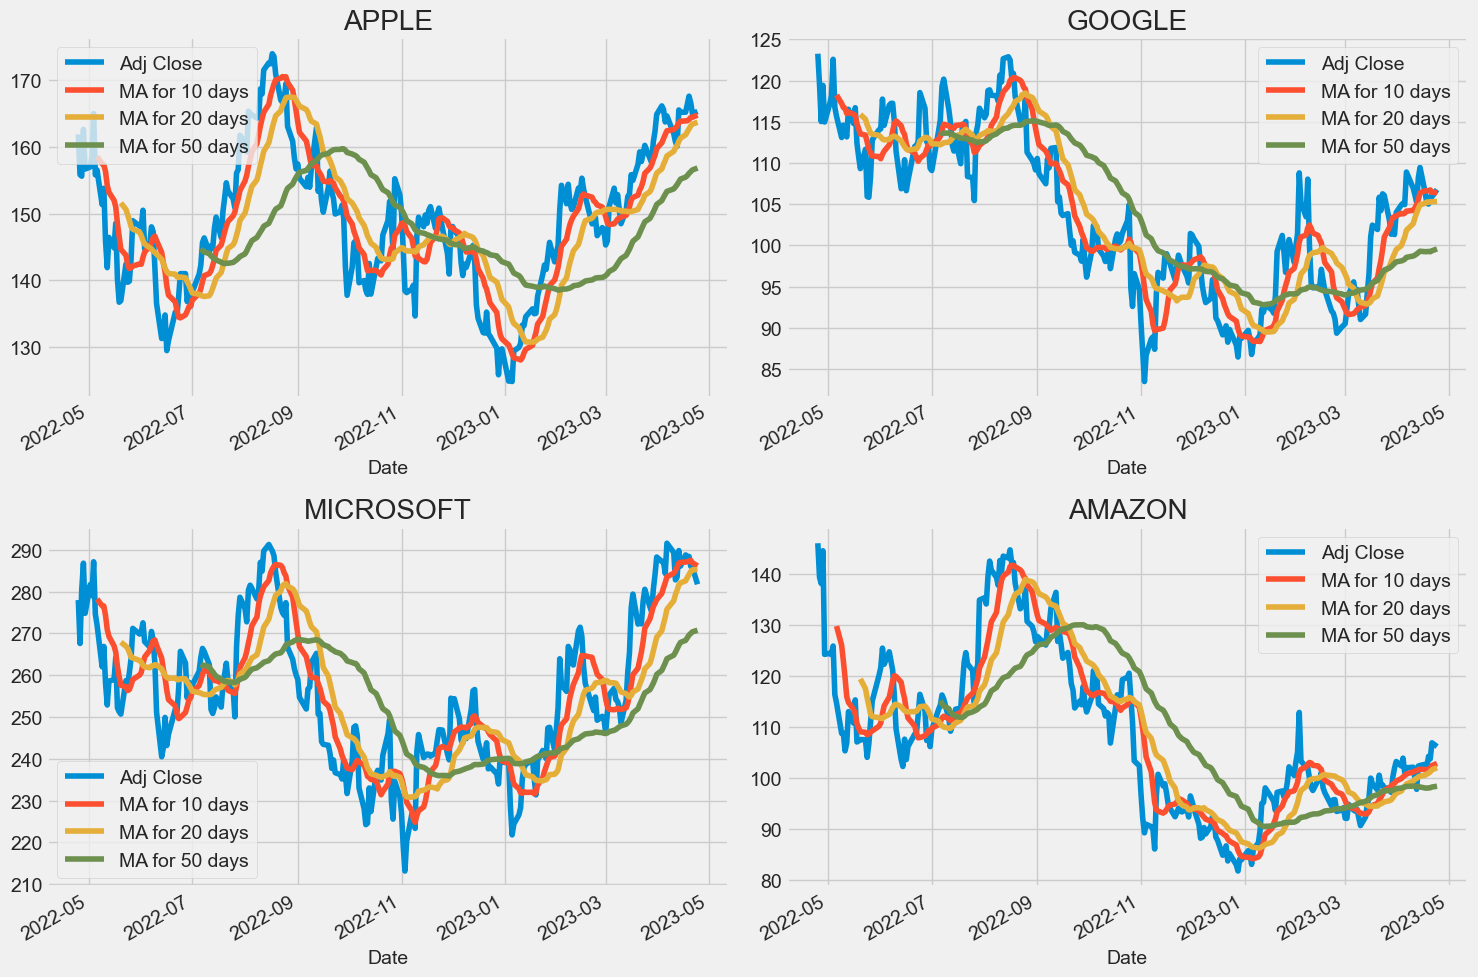

In [34]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


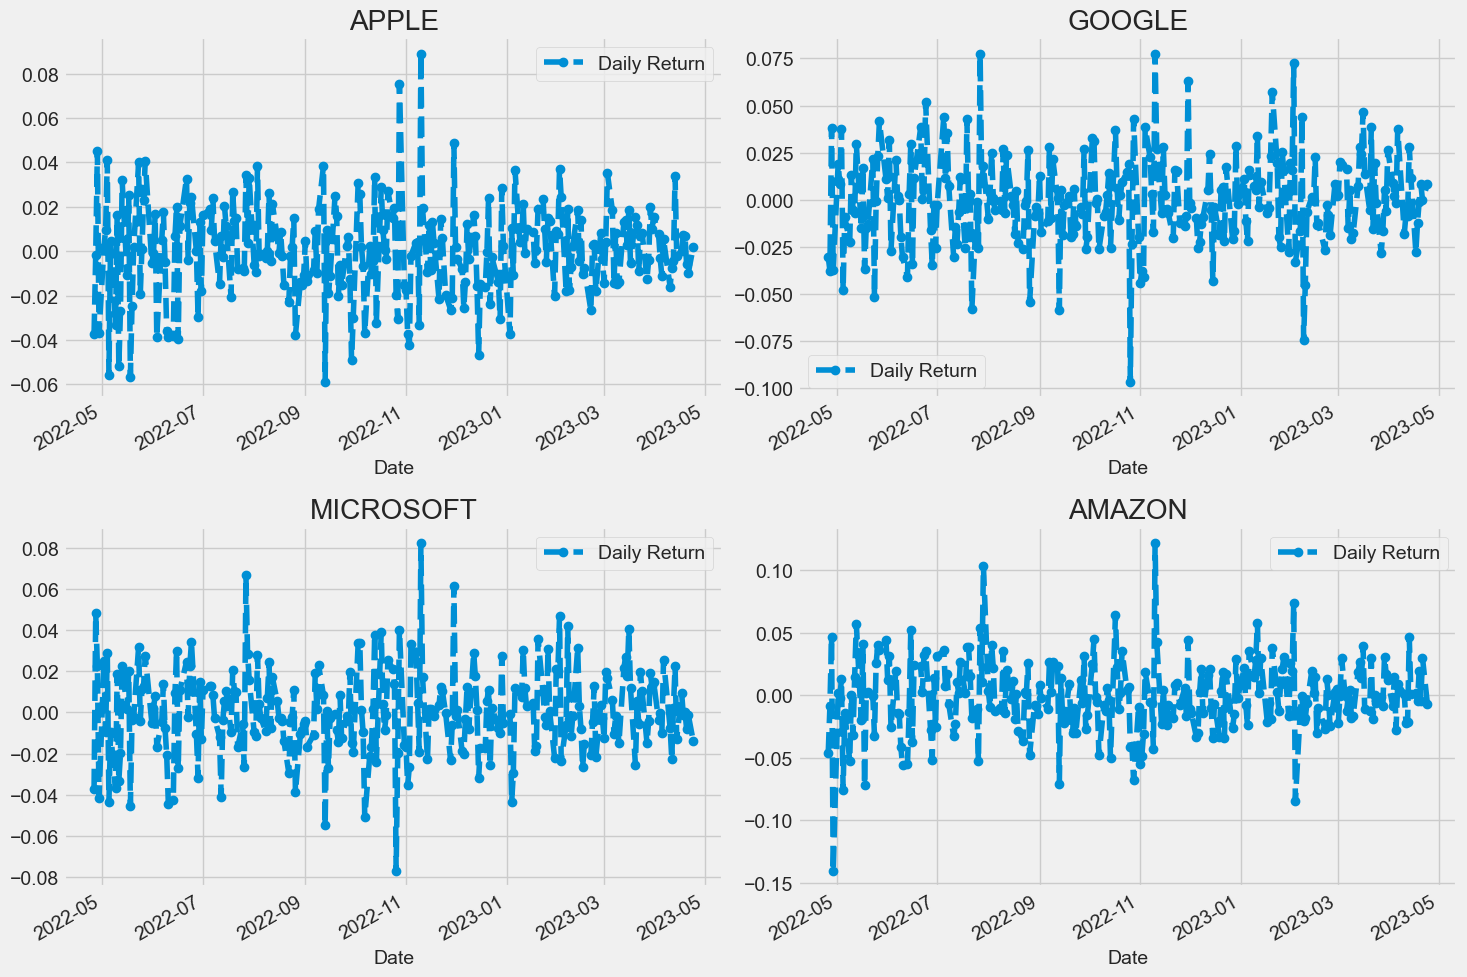

In [35]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

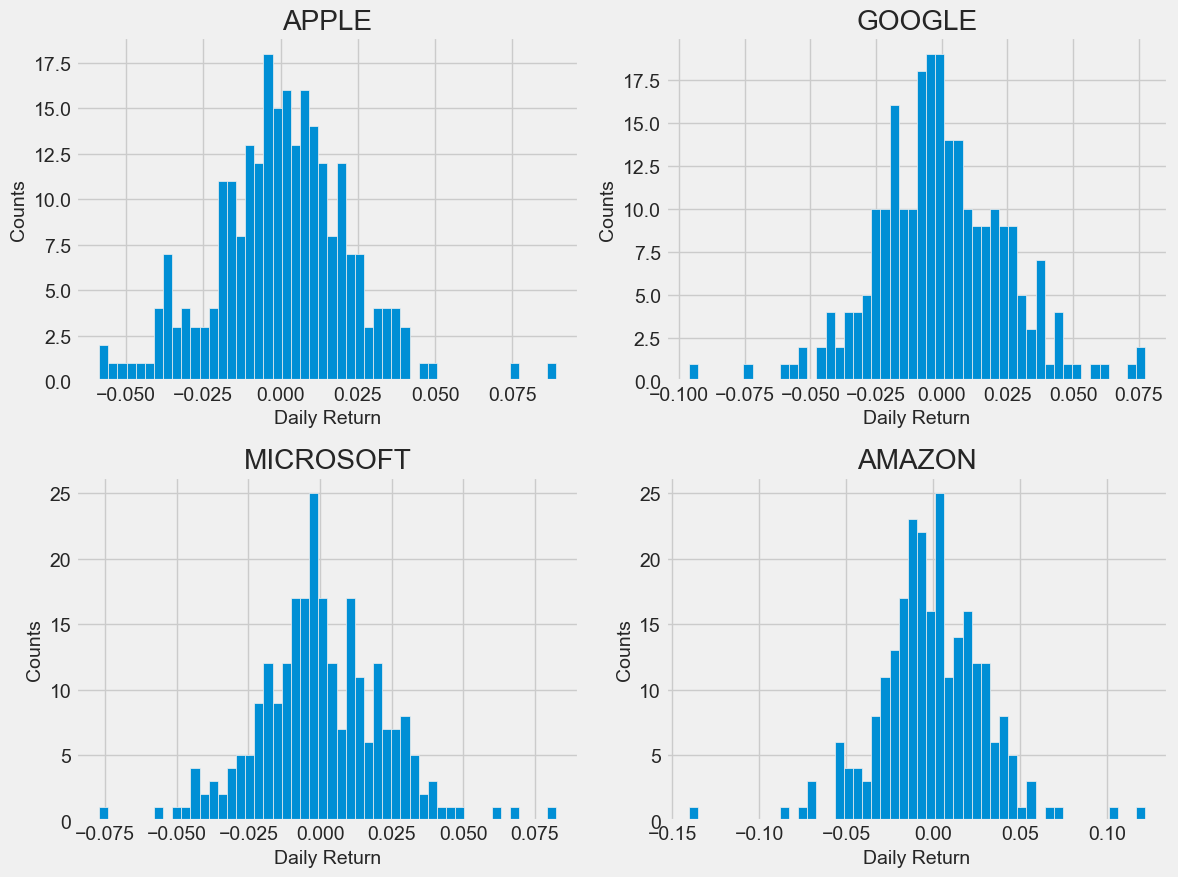

In [36]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [37]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-25,NaN,NaN,NaN,NaN
2022-04-26,-0.037328,-0.045751,-0.030377,-0.037404
2022-04-27,-0.001467,-0.008781,-0.037534,0.048109
2022-04-28,0.045155,0.046534,0.038176,0.022633
2022-04-29,-0.036605,-0.140494,-0.037224,-0.041812


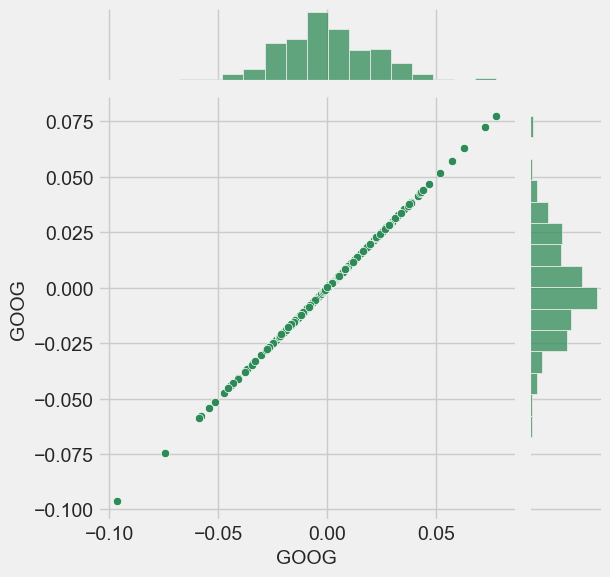

In [38]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


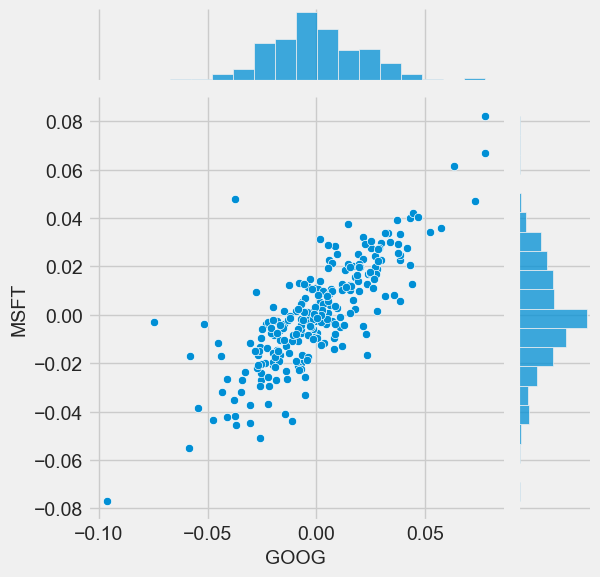

In [39]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

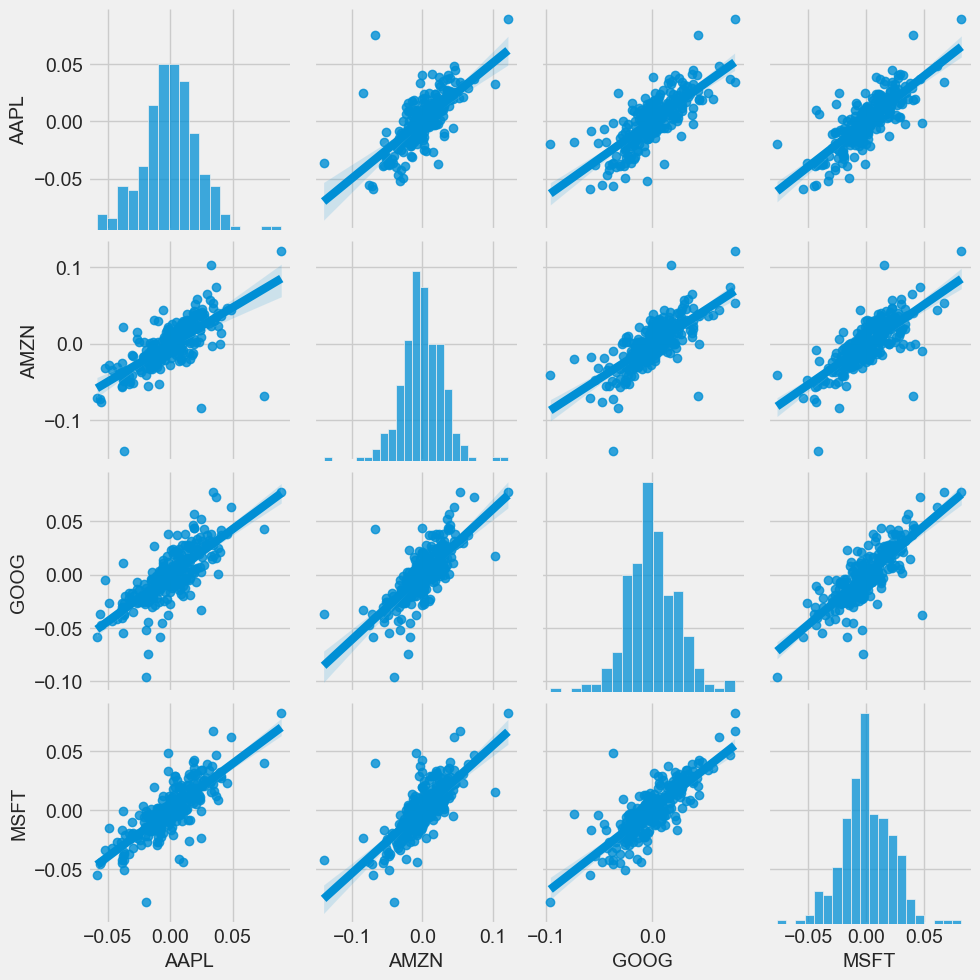

In [40]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')


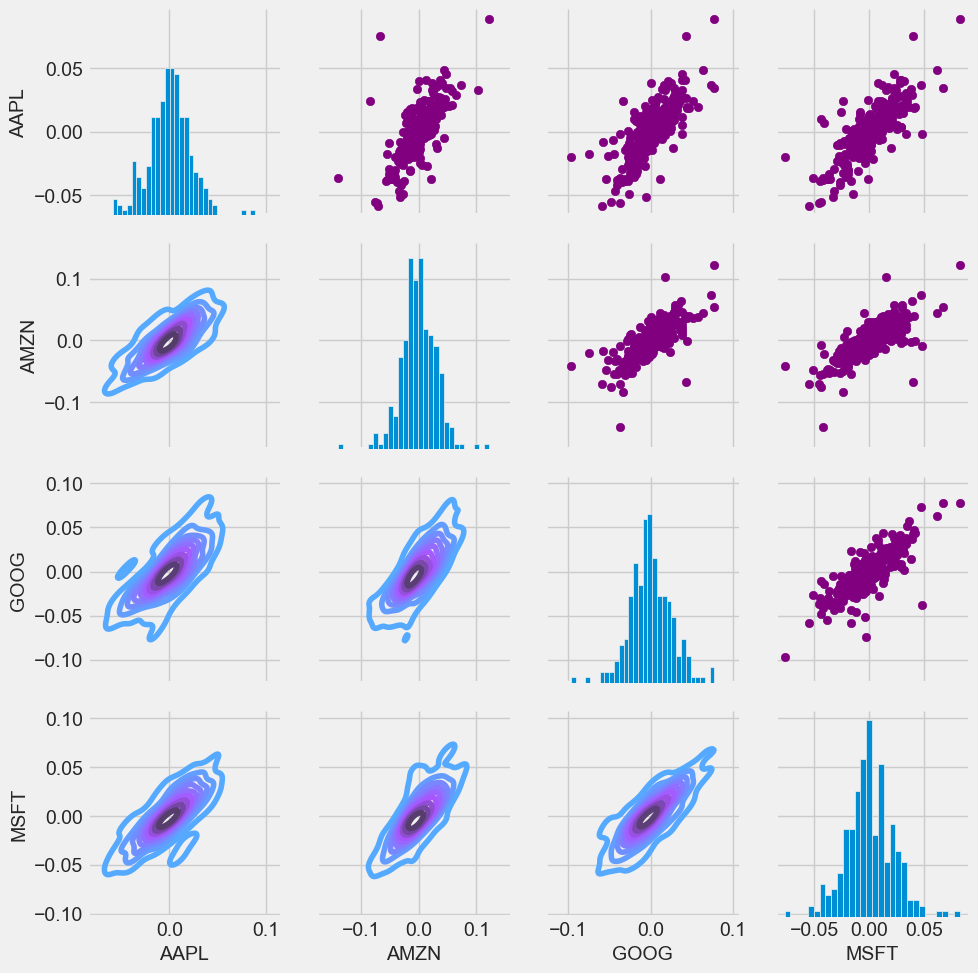

In [41]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

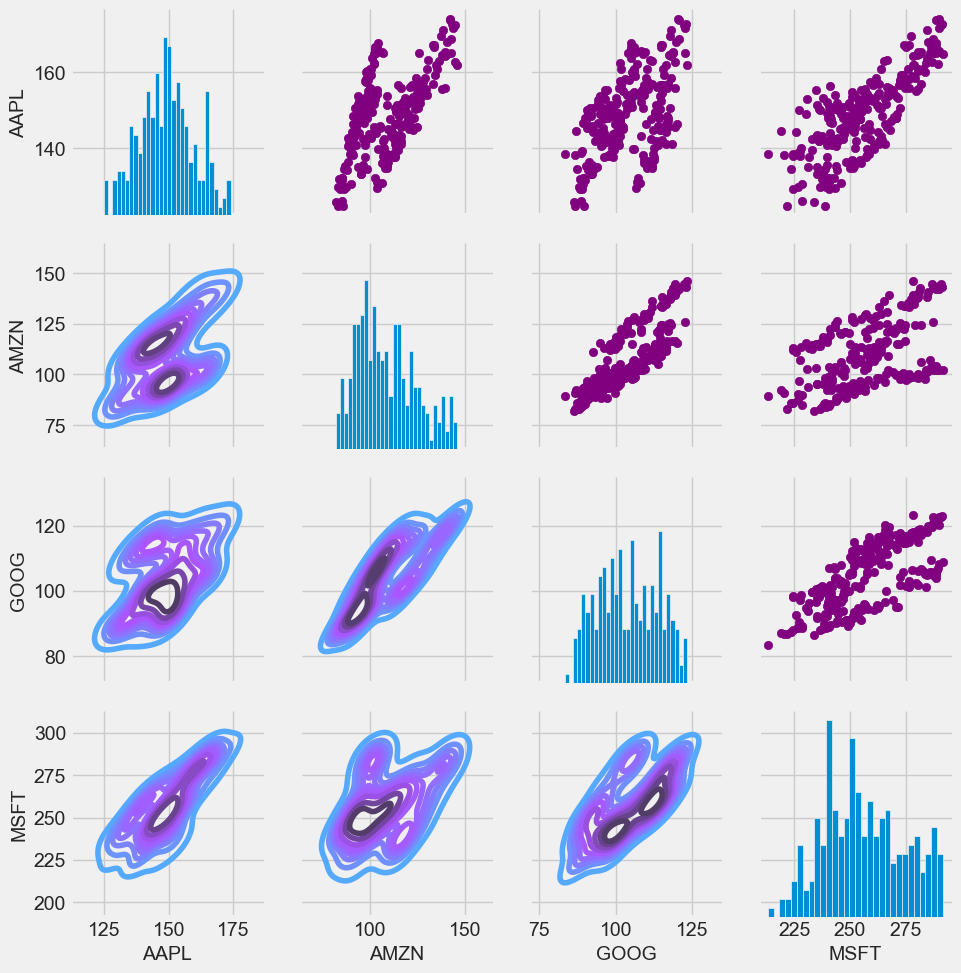

In [42]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

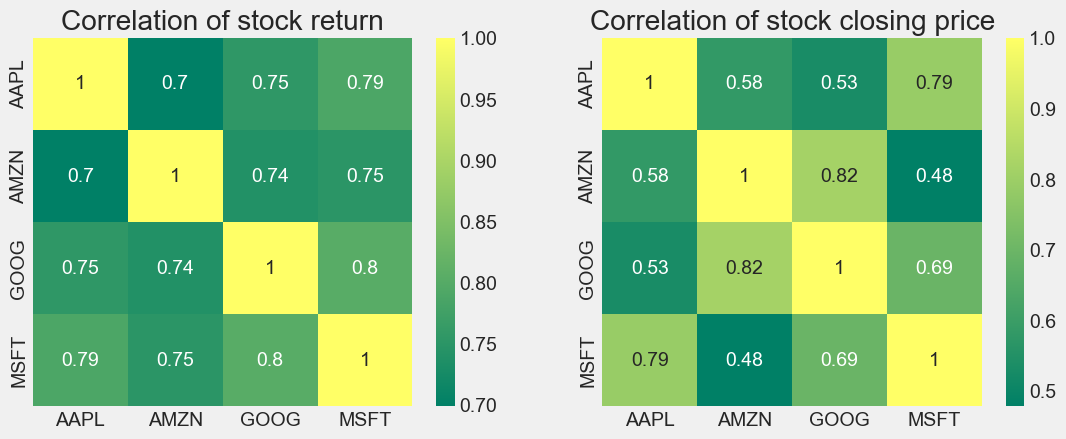

In [43]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [44]:
closing_df[closing_df.columns].corr()['MSFT'][:].sort_values(ascending=False).to_frame()


,MSFT
MSFT,1.000000
AAPL,0.788978
GOOG,0.694748
AMZN,0.478224


In [45]:
tech_rets[tech_rets.columns].corr()['MSFT'][:].sort_values(ascending=False).to_frame()


,MSFT
MSFT,1.000000
GOOG,0.803314
AAPL,0.788741
AMZN,0.750103


In [46]:
tech_rets

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-25,NaN,NaN,NaN,NaN
2022-04-26,-0.037328,-0.045751,-0.030377,-0.037404
2022-04-27,-0.001467,-0.008781,-0.037534,0.048109
2022-04-28,0.045155,0.046534,0.038176,0.022633
2022-04-29,-0.036605,-0.140494,-0.037224,-0.041812
...,...,...,...,...
2023-04-18,0.007505,-0.004283,-0.012216,-0.001489
2023-04-19,0.006968,0.019550,-0.000951,0.000277
2023-04-20,-0.005846,-0.004698,0.008379,-0.008112


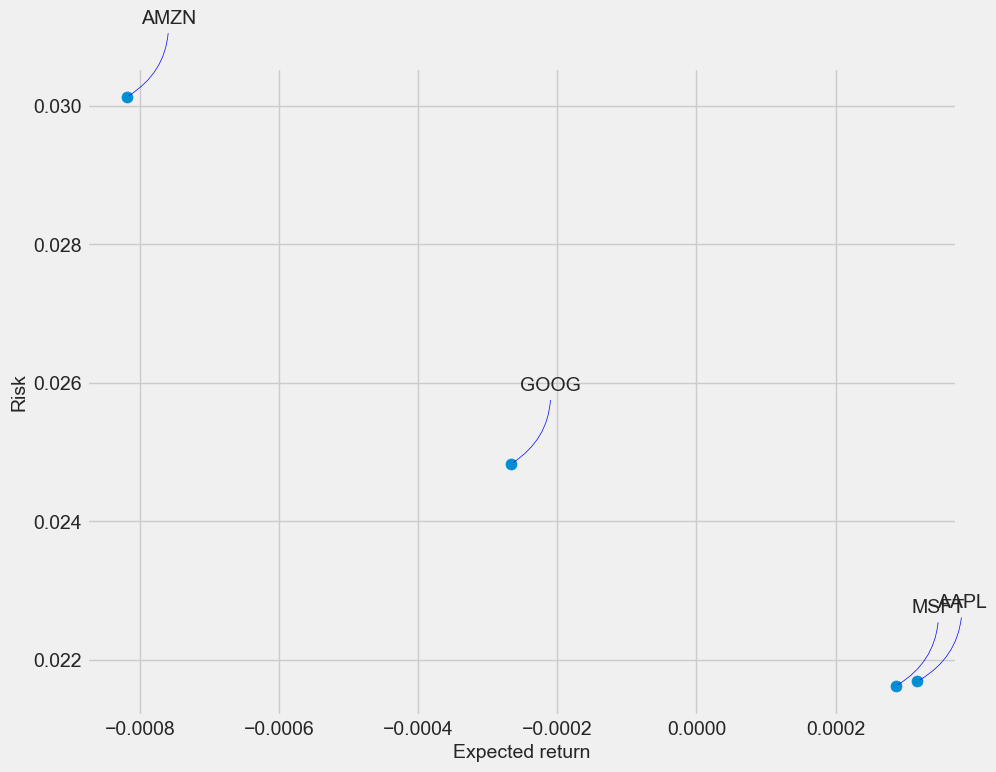

In [47]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting the closing price stock price of Microsoft


In [48]:
# Get the stock quote
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show teh data
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-18,291.570007,291.760010,287.010010,288.369995,288.369995,20161800
2023-04-19,285.989990,289.049988,284.540009,288.450012,288.450012,17150300
2023-04-20,285.250000,289.029999,285.079987,286.109985,286.109985,23244400
2023-04-21,285.010010,286.269989,283.059998,285.760010,285.760010,21665400
2023-04-24,282.089996,284.950012,278.720001,281.769989,281.769989,26590300


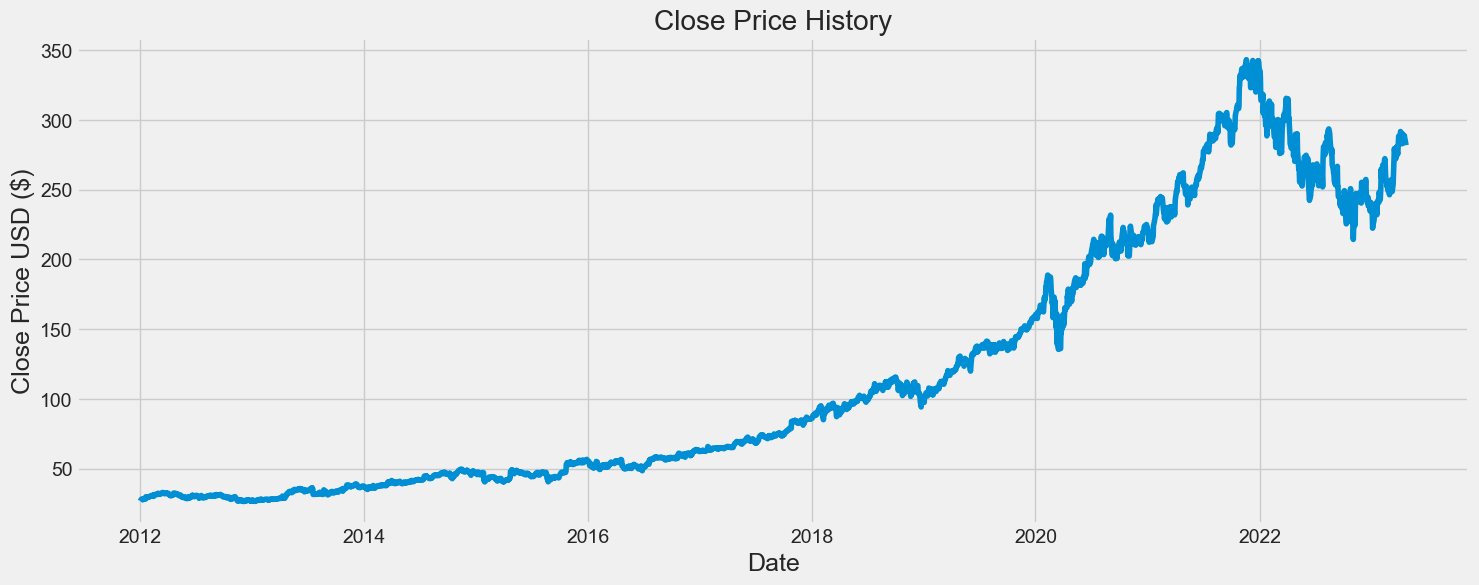

In [49]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [50]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2703

In [51]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.82004167],
       [0.81893674],
       [0.80633959]])

In [52]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902948, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638568, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989012, 0.02020585,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153685590104426]

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.0

In [83]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2643/2643 [==============================] - 57s 20ms/step - loss: 0.0013


In [67]:
def train_model(x_train,y_train, num_epochs=10, batch_size=32, validation_split=0.2):

            # Build the LSTM model
            model = Sequential()
            model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
            model.add(LSTM(64, return_sequences=False))
            model.add(Dense(25))
            model.add(Dense(1))

            # Compile the model
            model.compile(optimizer='adam', loss='mean_squared_error')

            # Train the model
            history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=validation_split)

            return model

In [77]:
x_train.shape[1]

60

In [78]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

# Get the models predicted price values 
model = train_model(x_train =x_train,y_train=y_train)


Epoch 1/10
67/67 [==============================] - 11s 95ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 2/10
67/67 [==============================] - 5s 80ms/step - loss: 1.0019e-04 - val_loss: 0.0020
Epoch 3/10
67/67 [==============================] - 5s 81ms/step - loss: 1.3630e-04 - val_loss: 8.9700e-04
Epoch 4/10
67/67 [==============================] - 5s 73ms/step - loss: 8.8976e-05 - val_loss: 0.0018
Epoch 5/10
67/67 [==============================] - 5s 73ms/step - loss: 1.0454e-04 - val_loss: 8.8959e-04
Epoch 6/10
67/67 [==============================] - 5s 72ms/step - loss: 1.0118e-04 - val_loss: 0.0018
Epoch 7/10
67/67 [==============================] - 5s 72ms/step - loss: 8.5359e-05 - val_loss: 9.8302e-04
Epoch 8/10
67/67 [==============================] - 5s 71ms/step - loss: 8.3587e-05 - val_loss: 0.0011
Epoch 9/10
67/67 [==============================] - 5s 73ms/step - loss: 8.6946e-05 - val_loss: 9.6454e-04
Epoch 10/10
5/5 [==============================] - 1s 37ms/s

9.621842783627429

In [84]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 34ms/step


8.151417677964035

C:\Users\ahmed\AppData\Local\Temp\ipykernel_17516\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


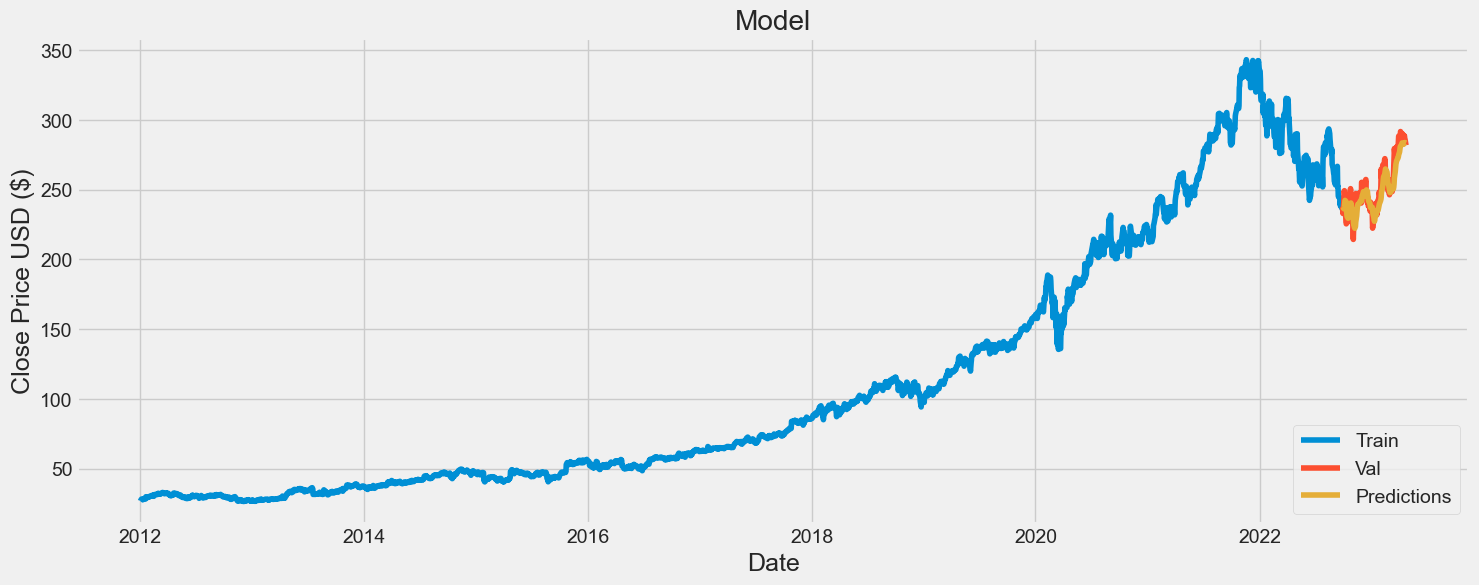

In [85]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [70]:
# Show the valid and predicted prices
len(valid)

142

In [86]:
valid[['Close', 'Predictions']].tail()

,Close,Predictions
Date,,
2023-04-18,288.369995,282.978333
2023-04-19,288.450012,283.367828
2023-04-20,286.109985,283.724609
2023-04-21,285.760010,283.632019
2023-04-24,281.769989,283.315430
